# Maşın Öyrənməsi Layihəsi: Addım-Addım İzah

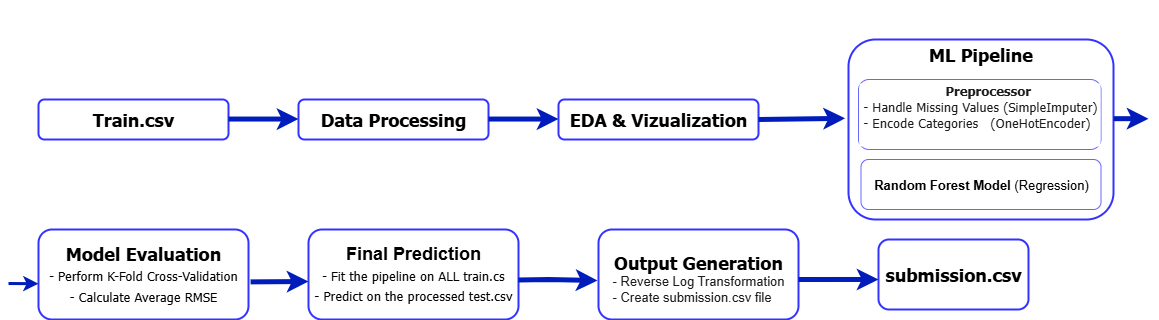

## Lazımlı kitabxanaları yükləyirik

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Dataseti yükləyirik

In [3]:
train_df = pd.read_csv(r'C:\Users\User\Desktop\Data\Ml Turing\Tasks\House Prices - Advanced Regression Techniques\dataset\train.csv')

print(train_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

## Original datseti qorumaq üçün kopyasını yaradırıq

In [5]:
train = train_df.copy()

##  Datanı anlamalıyıq

İlk addımımız datanı tanımaqdır. train.csv faylında evlərin xüsusiyyətləri (Id, LotArea və s.) və onların

qiymətləri (SalePrice) var.Biz bu xüsusiyyətlərdən istifadə edərək qiyməti proqnozlaşdıran bir model quracağıq.

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA & Vizualization

In [9]:
train.shape

(1460, 81)

In [11]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## SalePrice-in paylanmasını vizuallaşdırırıq ( Right skewed )

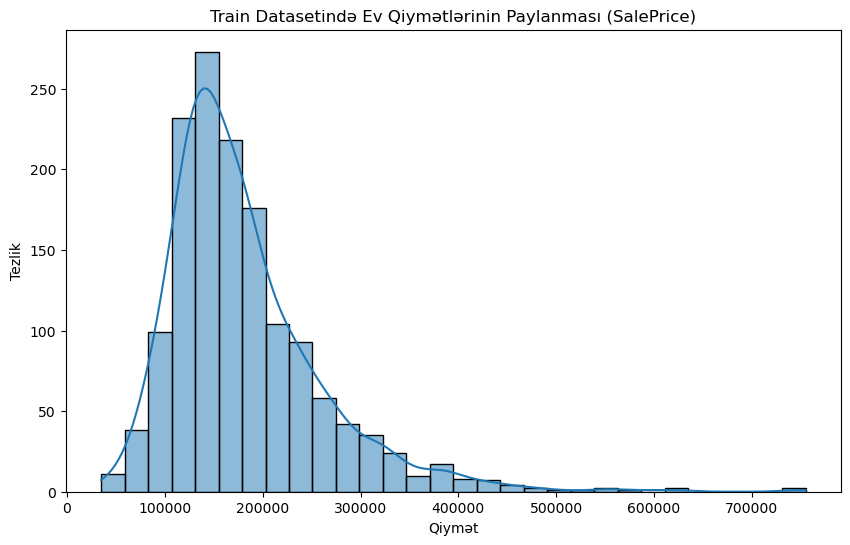

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Train Datasetində Ev Qiymətlərinin Paylanması (SalePrice)')
plt.xlabel('Qiymət')
plt.ylabel('Tezlik')
plt.show()


# Feature Selection

In [21]:
# X və y hissələrini ayırırıq
# X: bütün xüsusiyyətlər, yəni SalePrice və Id xaricindəki bütün sütunlar
X = train.drop(['Id', 'SalePrice'], axis=1)

# y: hədəf dəyişəni SalePrice
# Modelin daha yaxşı öyrənməsi üçün loqarifmik çevirmə tətbiq edirik
y = np.log1p(train['SalePrice'])

In [23]:
print(f"X ölçüsü: {X.shape}")
print(f"y ölçüsü: {y.shape}")

X ölçüsü: (1460, 79)
y ölçüsü: (1460,)


In [25]:
# Sayısal və kategorik xüsusiyyətləri ayırmaq
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

## Pipeline & Model Building

Maşın öyrənməsi prosesini avtomatlaşdırmaq üçün Pipeline qururuq. Pipeline bir neçə addımı ardıcıl olaraq birləşdirən bir zəncirdir.

**Niyə Pipeline istifadə edirik?**

* Avtomatlaşdırma: Bütün ön-işləmə addımlarını (boşluqları doldurmaq, datanı çevirmək) avtomatik edir.

* Ardıcıllıq: Təlim datasında etdiyimiz bütün çevirmələri test datasına da eynilə tətbiq edir.

* Məlumat Sızmasının Qarşısını Almaq: Bu, ən vacib səbəbdir. Pipeline təlim datasından öyrəndiyi statistikaları (məsələn, medianı və ya ən çox təkrarlanan dəyəri) test datasına tətbiq edir. Bu, modelin test datasından "gördüyü" hər hansı bir məlumatın qarşısını alır.

In [28]:
# Pipeline içində boş dəyərləri doldurmaq
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Ön-işləmə üçün ColumnTransformer hazırlayırıq
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Ön-işləmə və modeli birləşdirən əsas pipeline-ı qururuq
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1))
])

print("Ön-işləmə və model pipeline-ı uğurla quruldu.")

Ön-işləmə və model pipeline-ı uğurla quruldu.


## Modeli Qiymətləndirmək (Cross-Validation)

Modelimizin nə qədər yaxşı olduğunu görmək üçün onu qiymətləndirməliyik. Bunun üçün Cross-Validation istifadə edirik.

**Necə işləyir?**

* Datanı 5 hissəyə bölürük.

* Hər dəfə 4 hissəni təlim üçün, bir hissəni isə sınaq üçün istifadə edirik.

* Bu, modelimizin fərqli datalarda necə performans göstərdiyini yoxlamağa imkan verir.

**Niyə bunu edirik?**

* Bu, modelin həqiqi performansı haqqında etibarlı bir fikir əldə etməyimizə kömək edir və bizi yanıltıcı nəticələrdən qoruyur.

In [33]:
# K-Fold Cross-Validation tətbiq etmək
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RMSE nəticələrini saxlamaq üçün boş bir siyahı
rmse_scores = []

print("Cross-Validation prosesi başlayır...")
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Modeli təlim etmək (imputation və encoding artıq pipeline içindədir)
    model_pipeline.fit(X_train, y_train)

    # Validation hissəsi üzərində proqnozlar etmək
    y_pred = model_pipeline.predict(X_val)

    # Bu fold üçün RMSE-ni hesablamaq
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

    print(f"Fold {fold+1} üçün RMSE: {rmse:.4f}")

# Bütün foldların ortalama RMSE-sini hesablamaq
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("\n------------------------------")
print(f"Bütün foldlar üçün Ortalama RMSE: {mean_rmse:.4f}")
print(f"RMSE dəyərlərinin Standart Kənarlaşması: {std_rmse:.4f}")
print("------------------------------")

Cross-Validation prosesi başlayır...
Fold 1 üçün RMSE: 0.1466
Fold 2 üçün RMSE: 0.1273
Fold 3 üçün RMSE: 0.1773
Fold 4 üçün RMSE: 0.1491
Fold 5 üçün RMSE: 0.1233

------------------------------
Bütün foldlar üçün Ortalama RMSE: 0.1447
RMSE dəyərlərinin Standart Kənarlaşması: 0.0192
------------------------------


## Final Modelin Qurulması və Proqnozlar Etmək

Cross-Validation ilə modelimizin yaxşı işlədiyinə əmin olduq. 

İndi ən yaxşı nəticəni əldə etmək üçün bütün train datası üzərində final modelimizi öyrədirik və test.csv üzərində proqnozlar edirik.

**Final model nədir?**

Bu, test.csv üzərində proqnozlar etmək üçün istifadə edəcəyimiz ən güclü versiyadır.

Onu bütün təlim datası üzərində öyrədirik ki, mümkün olan ən çox biliyi əldə etsin.

## Final Modelin Qurulması və Proqnozlar Etmək
Cross-Validation ilə modelimizin yaxşı işlədiyinə əmin olduq. İndi ən yaxşı nəticəni əldə etmək üçün bütün train datası üzərində 
final modelimizi öyrədirik və test.csv üzərində proqnozlar edirik.

**Final model nədir?**

Bu, test.csv üzərində proqnozlar etmək üçün istifadə edəcəyimiz ən güclü versiyadır.

Onu bütün təlim datası üzərində öyrədirik ki, mümkün olan ən çox biliyi əldə etsin.

In [35]:
# Final modeli bütün verilər üzərində təlim edirik.
print("Final model bütün dataset üzərində təlim edilir...")
model_pipeline.fit(X, y)
print("Təlim tamamlandı.")

Final model bütün dataset üzərində təlim edilir...
Təlim tamamlandı.


In [39]:
# test.csv faylını yükləyirik
test_df = pd.read_csv(r'C:\Users\User\Desktop\Data\Ml Turing\Tasks\House Prices - Advanced Regression Techniques\dataset\test.csv')

# 'Id' sütununu gələcək üçün saxlayıriq
test_ids = test_df['Id']
X_kaggle_test = test_df.drop('Id', axis=1)

# `train.csv` üzərində etdiyin Feature engineering addımlarını
# `test.csv` üzərində tətbiq edirik
X_kaggle_test['TotalSF'] = X_kaggle_test['TotalBsmtSF'] + X_kaggle_test['1stFlrSF'] + X_kaggle_test['2ndFlrSF']
X_kaggle_test['YearsSinceBuilt'] = X_kaggle_test['YrSold'] - X_kaggle_test['YearBuilt']
X_kaggle_test['YearsSinceRemodel'] = X_kaggle_test['YrSold'] - X_kaggle_test['YearRemodAdd']

print("\nKaggle test dataseti hazırlandı.")



Kaggle test dataseti hazırlandı.


In [41]:
# Hazırlanmış test dataseti üzərində proqnozlar əldə edin.
# Pipeline bütün təmizləmə addımlarını avtomatik yerinə yetirir.
final_predictions = model_pipeline.predict(X_kaggle_test)

# Proqnozları loqarifmik çevirmədən geri qaytarın.
final_predictions = np.expm1(final_predictions)


In [53]:
# Nəticəni submission.csv faylına yazın.
submission_df = pd.DataFrame({'Id': test_ids, 'SalePrice': final_predictions})
submission_df.to_csv('submission.csv', index=False)


In [55]:
print("\nFinal Yükləmə Faylı (ilk 5 sətir):")
print(submission_df.head())


Final Yükləmə Faylı (ilk 5 sətir):
     Id      SalePrice
0  1461  126227.802479
1  1462  152412.154637
2  1463  179834.243224
3  1464  180830.997906
4  1465  196672.522714


In [77]:
submission_df

,Id,SalePrice
0,1461,126227.802479
1,1462,152412.154637
2,1463,179834.243224
3,1464,180830.997906
4,1465,196672.522714
...,...,...
1454,2915,83831.954190
1455,2916,85011.789541
1456,2917,151905.189168
1457,2918,115521.850453
